# Capstone Webscrapping using BeautifulSoup

   saya memutuskan untuk mengambil capstone project web scraping sebagai project pertama saya. goals nya adalah untuk mengimplementasikan web scraping, menganalisis data dan mengambil kesimpulan dari hasil analisa data tersebut. Untuk topik yang saya ambil adalah film terpopuler dari situs IMDB dalam rentan waktu satu tahun dimulai dari Januari 2021 sampai dengan Desember 2021


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [500]:
import requests
from flask import Flask, render_template
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from bs4 import BeautifulSoup 
import requests

In [501]:
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [502]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [503]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [504]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [505]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:5000])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8179402/">
    <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
   </a>
  </div>
  <div class="lister-item-content">
   <h3 class="lister-item-header">
    <span class="lister-item-index unbold text-primary">
     1.
    </span>
    <a href="/title/tt8179402/">
     Fate: The Winx Saga
    </a>
    <span class="lister-item-year text-muted unbold">
     (2021– )
    </span>
   </h3>
   <p class="text-muted">
    <span class="certificate">
     16+
    </span>
    

In [507]:
table.find_all("a", attrs = {"href":"/title/tt8179402/"})

[<a href="/title/tt8179402/"> <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a>,
 <a href="/title/tt8179402/">Fate: The Winx Saga</a>]

Finding row length.

In [508]:
table1 = table.find_all('div', attrs={'class':'lister-item mode-advanced'})
row_length = len(table1)
print(row_length)

50


Do the scrapping process here (please change this markdown with your explanation)

In [512]:
    imdb_rating = table.find_all('div', attrs={'class':"ratings-bar"})
    
    len(imdb_rating)
    
    movie_rating = imdb_rating[4].find('div', attrs={'class':"inline-block ratings-metascore"}) 
    
    if movie_rating is None:
        print("kosong")
    
    movie_rating.find('span', attrs={'class': "metascore"}).text.strip()
    

'65'

In [525]:
temp = [] #initiating a tuple

#mencari semua 'div' pada ratings bar
imdb_rating = table.find_all('div', attrs={'class':"ratings-bar"})

for i in range(0, row_length):
    
    #get movie_title
    movie_title = table.find_all("h3", attrs = {"class":"lister-item-header"})[i]
    movie_title = movie_title.find('a').text
    movie_title = movie_title.strip()

    ## get movie rating
    movie_rating = imdb_rating[i].find('div', attrs ={'class':"inline-block ratings-imdb-rating"}).text
    movie_rating = movie_rating.strip()
    
    ## get metascore
    movie_metascore = imdb_rating[i].find('div', attrs={'class':"inline-block ratings-metascore"})
    meta_score = 0
    
    if movie_metascore is not None:
        meta_score = movie_metascore.find('span', attrs={'class': "metascore"}).text.strip()
    
    #get votes
    votes = table.find_all('meta', attrs = {'itemprop':'ratingCount'})[i]['content']
    
    #scrapping process
    temp.append((movie_title,movie_rating,meta_score,votes))
temp 

[('Fate: The Winx Saga', '6.9', 0, '44690'),
 ('The White Lotus', '7.6', 0, '67867'),
 ('Only Murders in the Building', '8.1', 0, '96478'),
 ('Abbott Elementary', '8.2', 0, '13805'),
 ('The Black Phone', '7.0', '65', '113571'),
 ('Resident Alien', '8.1', 0, '39270'),
 ('American Horror Stories', '6.2', 0, '20810'),
 ('1883', '8.8', 0, '63250'),
 ('Reservation Dogs', '8.1', 0, '14659'),
 ('Spider-Man: No Way Home', '8.3', '71', '730735'),
 ('La scuola cattolica', '5.7', 0, '1817'),
 ('Dune: Part One', '8.0', '74', '614681'),
 ('Licorice Pizza', '7.2', '90', '105742'),
 ('Forsvinningen på Lørenskog', '6.1', 0, '1091'),
 ('Dopesick', '8.6', 0, '54607'),
 ("NCIS: Hawai'i", '6.3', 0, '5545'),
 ('Mona Lisa and the Blood Moon', '6.2', '69', '1055'),
 ('The Little Things', '6.3', '54', '99678'),
 ('Bloodlands', '6.6', 0, '5084'),
 ('Arcane: League of Legends', '9.0', 0, '197971'),
 ('Yellowjackets', '7.9', 0, '44917'),
 ('The Wheel of Time', '7.1', 0, '102470'),
 ('Sing 2', '7.4', '49', '65847

## Creating data frame & Data wrangling

Put the array into dataframe

In [622]:
import pandas as pd

imdb = pd.DataFrame(temp, columns = ('movie_title','movie_rating','meta_score','votes'))
imdb.head()

,movie_title,movie_rating,meta_score,votes
0,Fate: The Winx Saga,6.9,0,44690
1,The White Lotus,7.6,0,67867
2,Only Murders in the Building,8.1,0,96478
3,Abbott Elementary,8.2,0,13805
4,The Black Phone,7.0,65,113571


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [623]:
# Checking Tipe Data

imdb.dtypes

movie_title     object
movie_rating    object
meta_score      object
votes           object
dtype: object

In [624]:
# Mengubah Tipe Data

imdb['movie_title'] = imdb['movie_title'].astype('category')
imdb['movie_rating'] = imdb['movie_rating'].astype('float64')
imdb['meta_score'] = imdb['meta_score'].astype('int64')
imdb['votes'] = imdb['votes'].astype('int64')

imdb.dtypes

movie_title     category
movie_rating     float64
meta_score         int64
votes              int64
dtype: object

In [625]:
# set movie_title sebagai dataframe index
imdb = imdb.set_index('movie_title')

In [626]:
imdb.head()

,movie_rating,meta_score,votes
movie_title,,,
Fate: The Winx Saga,6.9,0,44690
The White Lotus,7.6,0,67867
Only Murders in the Building,8.1,0,96478
Abbott Elementary,8.2,0,13805
The Black Phone,7.0,65,113571


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [596]:
#Urutan 7 film terpopuler berdasarkan rating film

based_movie_rating = imdb.reset_index().sort_values('movie_rating', ascending = False)\
                [['movie_title','movie_rating']]
based_movie_rating.head(7)

,movie_title,movie_rating
19,Arcane: League of Legends,9.0
7,1883,8.8
14,Dopesick,8.6
37,Mare of Easttown,8.4
9,Spider-Man: No Way Home,8.3
3,Abbott Elementary,8.2
43,Loki,8.2


<AxesSubplot:xlabel='movie_title'>

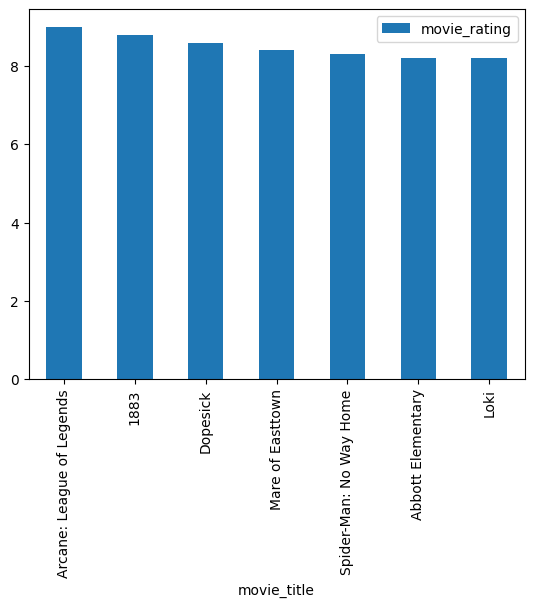

In [599]:
#Visualisasi 7 film terpopuler menggunakan diagram batang berdasarkan rating film

based_movie_rating = imdb.sort_values(by = "movie_rating", ascending = False).head(7)
based_movie_rating.reset_index().plot.bar(x='movie_title', y='movie_rating')

- Berdasarkan `movie_rating`; Arcane: League of Legends, 1883, dan Dopesice menjadi 3 film terpopuler tahun 2021

In [608]:
#Urutan 7 film terpopuler berdasarkan Votes
based_votes = imdb.reset_index().sort_values('votes', ascending = False)\
                [['movie_title','votes']]
based_votes.head(7)

,movie_title,votes
9,Spider-Man: No Way Home,730735
11,Dune: Part One,614681
42,Don't Look Up,526664
25,Ojing-eo geim,436252
23,No Time to Die,390393
48,Free Guy,361330
36,Eternals,333592


<AxesSubplot:ylabel='movie_title'>

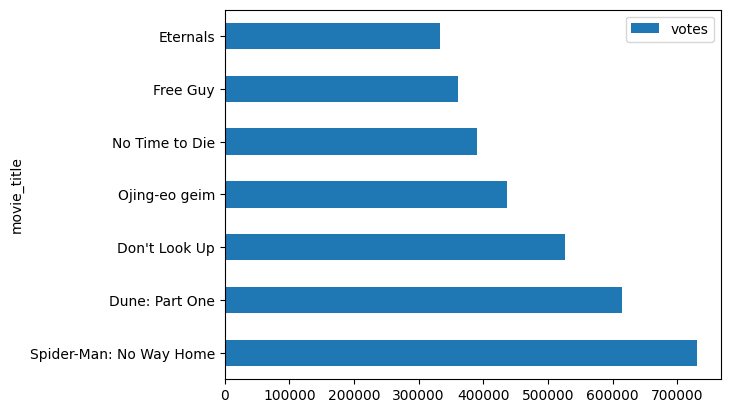

In [597]:
# Visualisasi 7 film terpopuler menggunakan diagram batang berdasarkan votes terbanyak

based_votes = imdb.sort_values(by = "votes", ascending = False).head(7)
based_votes.reset_index().plot.barh(x='movie_title', y='votes')

- Berdasarkan `votes`; Spiderman: No Way Home, Dune: Part One, dan Don't Look Up menjadi 3 film dengan vote terbanyak pada tahun 2021

In [607]:
#Urutan 7 film terpopuler berdasarkan Metascore
Based_metascore = imdb.reset_index().sort_values('meta_score', ascending = False)\
                [['movie_title','meta_score']]
Based_metascore.head(7)

,movie_title,meta_score
12,Licorice Pizza,90
45,Spencer,76
34,Pleasure,75
11,Dune: Part One,74
9,Spider-Man: No Way Home,71
35,Gekijouban Jujutsu Kaisen 0,71
16,Mona Lisa and the Blood Moon,69


<AxesSubplot:xlabel='movie_title'>

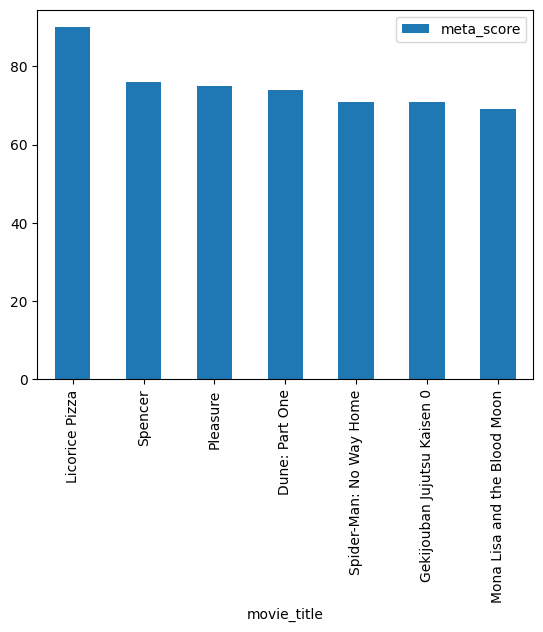

In [609]:
# Visualisasi 7 film terpopuler menggunakan diagram batang berdasarkan metascore

based_metascore = imdb.sort_values(by = "meta_score", ascending = False).head(7)
based_metascore.reset_index().plot.bar(x='movie_title', y='meta_score')


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.